# 0 Import

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# from pandas.core import groupby
# from pandas.core.frame import DataFrame

from my_pandas_extensions.database import collect_data

In [3]:
df = collect_data()
df.head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


# 1 column select 相關操作

## 1.1 選 column

### 1.1.1 用 name 來選

In [4]:
df[["order_date", "model", "total_price"]].head()

,order_date,model,total_price
0,2011-01-07,Jekyll Carbon 2,6070
1,2011-01-07,Trigger Carbon 2,5970
2,2011-01-10,Beast of the East 1,2770
3,2011-01-10,Trigger Carbon 2,5970
4,2011-01-10,Supersix Evo Hi-Mod Team,10660


### 1.1.2 用 column index (`.iloc`)來選

In [5]:
# 前三個column
df.iloc[:, 0:3].head()

,order_id,order_line,order_date
0,1,1,2011-01-07
1,1,2,2011-01-07
2,2,1,2011-01-10
3,2,2,2011-01-10
4,3,1,2011-01-10


In [6]:
# 後三個 column
df.iloc[:, -3:].head()

,bikeshop_name,city,state
0,Ithaca Mountain Climbers,Ithaca,NY
1,Ithaca Mountain Climbers,Ithaca,NY
2,Kansas City 29ers,Kansas City,KS
3,Kansas City 29ers,Kansas City,KS
4,Louisville Race Equipment,Louisville,KY


### 1.1.3 用 `.loc` 來選

* 如果我想選，從 `bikeshop_name`:`state` 的欄位，我可以寫成 `df.loc[:, "bikeshop_name":"state"]` 

In [7]:
df.loc[:, "bikeshop_name":"state"].head()

,bikeshop_name,city,state
0,Ithaca Mountain Climbers,Ithaca,NY
1,Ithaca Mountain Climbers,Ithaca,NY
2,Kansas City 29ers,Kansas City,KS
3,Kansas City 29ers,Kansas City,KS
4,Louisville Race Equipment,Louisville,KY


### 1.1.4 用欄位 type 來選

* 我們有時候，會喜歡把 數值型資料擺一堆，類別型資料擺一堆，時間型資料擺一堆  
* 那在 R ，我們會用 `select(df, where(is.numeric))` 這種方式來選出 numeric 的 column  
* 在 python，就可以用 `df.select_dtypes(include = ['int', 'float'])` ，來把數值型資料選出來：

In [8]:
df.select_dtypes(include = ['int', 'float']).head()

,order_id,order_line,quantity,price,total_price
0,1,1,1,6070,6070
1,1,2,1,5970,5970
2,2,1,1,2770,2770
3,2,2,1,5970,5970
4,3,1,1,10660,10660


* 那如果，我想選 "不是" 數值型的欄位，在 R 中，是用 `select(df, where(!is.numeric))`，在 python，就把剛剛的 `include` 改成 `exclude` 就好：

In [9]:
df.select_dtypes(exclude = ['int', 'float']).head()

,order_date,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,2011-01-07,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,2011-01-07,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2011-01-10,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2011-01-10,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,2011-01-10,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


### 1.1.5 用 regex 來選 column

* 在 R 中，我們會用 `select(data, starts_with("cat"))` 這種 tidy select function 來幫忙處理。  
* 在 pandas 中，我們可以用 `df.filter(regex = "xxx", axis = 1)` 來做正規表達式的篩選。要注意的事，python是所有涉及條件判斷的(不管 row 或 column)，都是用 `filter`。
  * `axis = 0` 表示要對 row 做 filter
  * `axis = 1` 表示要對 column 做 filter  
* 看例子：

In [10]:
df.filter(regex = "(^model)|(^cat)", axis = 1).head() # regex 裡面的條件，是要抓出 model 開頭 或 cat 開頭的字串。 axis = 1 是表示要對 column 做 filter

,model,category_1,category_2
0,Jekyll Carbon 2,Mountain,Over Mountain
1,Trigger Carbon 2,Mountain,Over Mountain
2,Beast of the East 1,Mountain,Trail
3,Trigger Carbon 2,Mountain,Over Mountain
4,Supersix Evo Hi-Mod Team,Road,Elite Road


## 1.2 刪除 columns

* 在 R 裡面，我們用 `select(data, -c(var1, var2))`就可以刪掉 var1, var2 這 2 個 columns  
* 在 python 中，是用 `data.drop(["var1", "var2"], axis = 1)` 來處理。一樣的，axis = 1 是指 column
* 舉例來說，我要刪掉 `order_id` 和 `order_line` 這兩個欄位：

In [11]:
df.drop(["order_id", "order_line"], axis = 1).head()

,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


## 1.3 欄位順序重排

* 要排欄位順序時，常常都是想把 "某些" column 移到最前面，然後其他排後面
* 例如我在做公司產品分析時，會把 project_code, model, pn 放前面，其他放後面
* 那在 R 裡面，會寫成 `select(df, project_code, model, pn, everything())`
* 但在 python 裡面，就得用比較 tricky 的方式來做： 
  * 法一： 切成兩個 df，再併起來
  * 法二： 做出我想要的順序的 list，再 select他

### 1.3.1 切成兩個 df，再併起來

* 舉例來說，我如果想把 `model`, `category_1`, `category_2` 放在最前面，我可以這樣做

In [12]:
front = ['model', 'category_1', 'category_2']
df1 = df[front]
df2 = df.drop(front, axis = 1)
pd.concat([df1, df2], axis = 1).head()

,model,category_1,category_2,order_id,order_line,order_date,quantity,price,total_price,frame_material,bikeshop_name,city,state
0,Jekyll Carbon 2,Mountain,Over Mountain,1,1,2011-01-07,1,6070,6070,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,Trigger Carbon 2,Mountain,Over Mountain,1,2,2011-01-07,1,5970,5970,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,Beast of the East 1,Mountain,Trail,2,1,2011-01-10,1,2770,2770,Aluminum,Kansas City 29ers,Kansas City,KS
3,Trigger Carbon 2,Mountain,Over Mountain,2,2,2011-01-10,1,5970,5970,Carbon,Kansas City 29ers,Kansas City,KS
4,Supersix Evo Hi-Mod Team,Road,Elite Road,3,1,2011-01-10,1,10660,10660,Carbon,Louisville Race Equipment,Louisville,KY


### 1.3.2 做出我想要的順序的 list，再 select他

* 和剛剛的例子一樣，我如果想把 `model`, `category_1`, `category_2` 放在最前面，我有兩種做法：

#### 1.3.2.1 用 set difference 的方式來做

* 要做 set difference 的話，步驟如下：  
  * 先把兩個 list 都轉成 set  
  * 用 set1 - set2 來得到差集 
  * 轉回 list
* 舉例如下：

In [13]:
l = df.columns.tolist()
print(f"original column order: {l}")
front = ["model", "category_1", "category_2"]
print(f"front: {front}")
end = list(set(l)-set(front))
print(f"end: {end}")
new_order = [*front, *end] # 把 "*" 加在 list 前面，是為了展開這個list的最外層，不然 [front, end] 會變成 [[], []] 這種 list
print(f"new_order: {new_order}")
df[new_order].head()

original column order: ['order_id', 'order_line', 'order_date', 'quantity', 'price', 'total_price', 'model', 'category_1', 'category_2', 'frame_material', 'bikeshop_name', 'city', 'state']
front: ['model', 'category_1', 'category_2']
end: ['price', 'state', 'order_id', 'total_price', 'quantity', 'frame_material', 'order_line', 'bikeshop_name', 'city', 'order_date']
new_order: ['model', 'category_1', 'category_2', 'price', 'state', 'order_id', 'total_price', 'quantity', 'frame_material', 'order_line', 'bikeshop_name', 'city', 'order_date']


,model,category_1,category_2,price,state,order_id,total_price,quantity,frame_material,order_line,bikeshop_name,city,order_date
0,Jekyll Carbon 2,Mountain,Over Mountain,6070,NY,1,6070,1,Carbon,1,Ithaca Mountain Climbers,Ithaca,2011-01-07
1,Trigger Carbon 2,Mountain,Over Mountain,5970,NY,1,5970,1,Carbon,2,Ithaca Mountain Climbers,Ithaca,2011-01-07
2,Beast of the East 1,Mountain,Trail,2770,KS,2,2770,1,Aluminum,1,Kansas City 29ers,Kansas City,2011-01-10
3,Trigger Carbon 2,Mountain,Over Mountain,5970,KS,2,5970,1,Carbon,2,Kansas City 29ers,Kansas City,2011-01-10
4,Supersix Evo Hi-Mod Team,Road,Elite Road,10660,KY,3,10660,1,Carbon,1,Louisville Race Equipment,Louisville,2011-01-10


#### 1.3.2.2 用 list comprehension 來做

* 我們也可以炫技一點，把剛剛 set difference 那邊，換成用 list comprehension 來做：

In [14]:
l = df.columns.tolist()
print(f"original column order: {l}")
front = ["model", "category_1", "category_2"]
print(f"front: {front}")
end = [col for col in l if col not in front] # list comprehension 用在這
print(f"end: {end}")
new_order = [*front, *end] # 把 "*" 加在 list 前面，是為了展開這個list的最外層，不然 [front, end] 會變成 [[], []] 這種 list
print(f"new_order: {new_order}")
df[new_order].head()

original column order: ['order_id', 'order_line', 'order_date', 'quantity', 'price', 'total_price', 'model', 'category_1', 'category_2', 'frame_material', 'bikeshop_name', 'city', 'state']
front: ['model', 'category_1', 'category_2']
end: ['order_id', 'order_line', 'order_date', 'quantity', 'price', 'total_price', 'frame_material', 'bikeshop_name', 'city', 'state']
new_order: ['model', 'category_1', 'category_2', 'order_id', 'order_line', 'order_date', 'quantity', 'price', 'total_price', 'frame_material', 'bikeshop_name', 'city', 'state']


,model,category_1,category_2,order_id,order_line,order_date,quantity,price,total_price,frame_material,bikeshop_name,city,state
0,Jekyll Carbon 2,Mountain,Over Mountain,1,1,2011-01-07,1,6070,6070,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,Trigger Carbon 2,Mountain,Over Mountain,1,2,2011-01-07,1,5970,5970,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,Beast of the East 1,Mountain,Trail,2,1,2011-01-10,1,2770,2770,Aluminum,Kansas City 29ers,Kansas City,KS
3,Trigger Carbon 2,Mountain,Over Mountain,2,2,2011-01-10,1,5970,5970,Carbon,Kansas City 29ers,Kansas City,KS
4,Supersix Evo Hi-Mod Team,Road,Elite Road,3,1,2011-01-10,1,10660,10660,Carbon,Louisville Race Equipment,Louisville,KY


# 2 arrange rows

* 這部分還蠻簡單的，直接整理 code 就好：

In [15]:
df.sort_values('total_price', ascending=False).head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
3015,405,9,2012-03-22,10,10660,106600,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Ann Arbor Speed,Ann Arbor,MI
3009,405,3,2012-03-22,8,12790,102320,Supersix Evo Black Inc.,Road,Elite Road,Carbon,Ann Arbor Speed,Ann Arbor,MI
14003,1762,11,2015-06-11,7,12250,85750,Habit Hi-Mod Black Inc.,Mountain,Trail,Carbon,Albuquerque Cycles,Albuquerque,NM
6547,846,7,2013-05-21,9,9060,81540,Scalpel-Si Race,Mountain,Cross Country Race,Carbon,Albuquerque Cycles,Albuquerque,NM
7464,954,10,2013-07-30,9,9060,81540,Scalpel-Si Race,Mountain,Cross Country Race,Carbon,Columbus Race Equipment,Columbus,OH


In [16]:
df.sort_values('order_date', ascending=False).head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
15643,2000,8,2015-12-25,1,3200,3200,Scalpel-Si 5,Mountain,Cross Country Race,Aluminum,Austin Cruisers,Austin,TX
15639,2000,4,2015-12-25,1,2660,2660,CAAD Disc Ultegra,Road,Elite Road,Aluminum,Austin Cruisers,Austin,TX
15637,2000,2,2015-12-25,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Austin Cruisers,Austin,TX
15638,2000,3,2015-12-25,1,1250,1250,CAAD8 Tiagra,Road,Elite Road,Aluminum,Austin Cruisers,Austin,TX
15636,2000,1,2015-12-25,1,1250,1250,Synapse Disc Tiagra,Road,Endurance Road,Aluminum,Austin Cruisers,Austin,TX


In [17]:
df.sort_values(['category_1', 'order_date'], ascending = [True, False]).head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
15640,2000,5,2015-12-25,1,1350,1350,Trail 2,Mountain,Sport,Aluminum,Austin Cruisers,Austin,TX
15642,2000,7,2015-12-25,1,2880,2880,F-Si Carbon 4,Mountain,Cross Country Race,Carbon,Austin Cruisers,Austin,TX
15643,2000,8,2015-12-25,1,3200,3200,Scalpel-Si 5,Mountain,Cross Country Race,Aluminum,Austin Cruisers,Austin,TX
15603,1995,3,2015-12-23,1,3200,3200,Scalpel 29 4,Mountain,Cross Country Race,Aluminum,Kansas City 29ers,Kansas City,KS
15604,1995,4,2015-12-23,1,2340,2340,F-Si 1,Mountain,Cross Country Race,Aluminum,Kansas City 29ers,Kansas City,KS


# 3 Rowwise filtering (slicing)

## 3.1 數值型欄位常用的 filter

* 我想篩選出 `price` 這個欄位 > 3000 的資料，可以用  
  * series 的 條件判斷
  * query 語法

In [18]:
df[df["price"]>3000].head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
5,3,2,2011-01-10,1,3200,3200,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY


In [19]:
df.query("price > 3000").head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
5,3,2,2011-01-10,1,3200,3200,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY


* 如果要在 `query` 語句中，用到定義的 variable，那就要用 
  * string format 的寫法
  * 或是，在變數前面加上 `@` 
* 例如：

In [20]:
value = 3000
df.query(f"price > {value}").head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
5,3,2,2011-01-10,1,3200,3200,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY


In [21]:
df.query("price > @value").head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
5,3,2,2011-01-10,1,3200,3200,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY


## 3.2 時間型欄位常用的 filter

* 時間型資料，重點就在要把要比較的時間，用 `pd.datetime()` 轉成時間格式。
* 例如，我想篩選出 `order_date` > "2015-01-01" 的資料：

In [22]:
df[df.order_date >= pd.to_datetime("2015-01-01")].head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
11849,1510,1,2015-01-01,1,3730,3730,Synapse Carbon Disc Ultegra,Road,Endurance Road,Carbon,Louisville Race Equipment,Louisville,KY
11850,1510,2,2015-01-01,1,2660,2660,Synapse Carbon Ultegra 4,Road,Endurance Road,Carbon,Louisville Race Equipment,Louisville,KY
11851,1510,3,2015-01-01,1,8200,8200,Trigger Carbon 1,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY
11852,1511,1,2015-01-01,2,1840,3680,Supersix Evo Tiagra,Road,Elite Road,Carbon,Kansas City 29ers,Kansas City,KS
11853,1512,1,2015-01-05,1,3500,3500,SuperX Hi-Mod CX1,Road,Cyclocross,Carbon,Ithaca Mountain Climbers,Ithaca,NY


In [23]:
df.query(f"order_date >= @pd.to_datetime('2015-01-01')").head() # 這邊要小心，用 string format 的寫法是不行的，一定得用 "@"

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
11849,1510,1,2015-01-01,1,3730,3730,Synapse Carbon Disc Ultegra,Road,Endurance Road,Carbon,Louisville Race Equipment,Louisville,KY
11850,1510,2,2015-01-01,1,2660,2660,Synapse Carbon Ultegra 4,Road,Endurance Road,Carbon,Louisville Race Equipment,Louisville,KY
11851,1510,3,2015-01-01,1,8200,8200,Trigger Carbon 1,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY
11852,1511,1,2015-01-01,2,1840,3680,Supersix Evo Tiagra,Road,Elite Road,Carbon,Kansas City 29ers,Kansas City,KS
11853,1512,1,2015-01-05,1,3500,3500,SuperX Hi-Mod CX1,Road,Cyclocross,Carbon,Ithaca Mountain Climbers,Ithaca,NY


## 3.3 類別型欄位常用的 filter

* 在 R 裡面，類別型資料常用的 filter 就是 `%in%` ,`! (col1 %in% xxx)`, `==` , `str_detect(col1, regex)` 
* 在 python 裡面，就是用 `df["col1"].isin(xxx)`, `~ (df["col1"].isin(xxx))`, `==` 來處理
* 重點： python 的 `~` 就是 R 的 `!`
* 例如： 撈出 `category_2` 中 有出現 `Trianthalon` 或 `Over Mountain` 的資料：

In [24]:
df[df['category_2'].isin(['Triathalon', 'Over Mountain'])].head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
5,3,2,2011-01-10,1,3200,3200,Jekyll Carbon 4,Mountain,Over Mountain,Carbon,Louisville Race Equipment,Louisville,KY
15,6,2,2011-01-11,1,4500,4500,Slice Hi-Mod Dura Ace D12,Road,Triathalon,Carbon,Phoenix Bi-peds,Phoenix,AZ


* 那如果要排除 `category_2` 中 有出現 `Trianthalon` 或 `Over Mountain` 的資料：

In [25]:
df[~df['category_2'].isin(['Triathalon', 'Over Mountain'])].head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
6,3,3,2011-01-10,1,12790,12790,Supersix Evo Black Inc.,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
7,3,4,2011-01-10,1,5330,5330,Supersix Evo Hi-Mod Dura Ace 2,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY
8,3,5,2011-01-10,1,1570,1570,Synapse Disc 105,Road,Endurance Road,Aluminum,Louisville Race Equipment,Louisville,KY


## 3.4 組合技

## 3.5 slicing

In [26]:
df[:5]

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


In [27]:

df.head(5)

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


In [28]:
df.tail(5)

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
15639,2000,4,2015-12-25,1,2660,2660,CAAD Disc Ultegra,Road,Elite Road,Aluminum,Austin Cruisers,Austin,TX
15640,2000,5,2015-12-25,1,1350,1350,Trail 2,Mountain,Sport,Aluminum,Austin Cruisers,Austin,TX
15641,2000,6,2015-12-25,1,1680,1680,CAAD12 105,Road,Elite Road,Aluminum,Austin Cruisers,Austin,TX
15642,2000,7,2015-12-25,1,2880,2880,F-Si Carbon 4,Mountain,Cross Country Race,Carbon,Austin Cruisers,Austin,TX
15643,2000,8,2015-12-25,1,3200,3200,Scalpel-Si 5,Mountain,Cross Country Race,Aluminum,Austin Cruisers,Austin,TX


### 3.5.2 index slicing

In [29]:
df.iloc[0:5, [1, 3, 5]]

,order_line,quantity,total_price
0,1,1,6070
1,2,1,5970
2,1,1,2770
3,2,1,5970
4,1,1,10660


In [30]:
df.iloc[0:5, :]

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


In [31]:
df.iloc[0:5]

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY


In [32]:
df.iloc[:, [1,3,5]]

,order_line,quantity,total_price
0,1,1,6070
1,2,1,5970
2,1,1,2770
3,2,1,5970
4,1,1,10660
...,...,...,...
15639,4,1,2660
15640,5,1,1350
15641,6,1,1680
15642,7,1,2880


In [33]:
df.iloc[[1,3,4],[1,3,4]]

,order_line,quantity,price
1,2,1,5970
3,2,1,5970
4,1,1,10660


## 3.6. unique/distinct values

### 3.6.1 一個數列找 unique

In [34]:
df['category_2'].unique()

array(['Over Mountain', 'Trail', 'Elite Road', 'Endurance Road', 'Sport',
       'Cross Country Race', 'Cyclocross', 'Triathalon', 'Fat Bike'],
      dtype=object)

### 3.6.2 distinct 欄位 (drop_duplicate)

In [35]:
df[['model']].drop_duplicates()

,model
0,Jekyll Carbon 2
1,Trigger Carbon 2
2,Beast of the East 1
4,Supersix Evo Hi-Mod Team
5,Jekyll Carbon 4
...,...
234,Habit 4
248,Habit Hi-Mod Black Inc.
253,F-Si Hi-Mod 1
311,CAAD12 105


In [36]:
df[['model', 'category_1', 'category_2', 'frame_material']].drop_duplicates()

,model,category_1,category_2,frame_material
0,Jekyll Carbon 2,Mountain,Over Mountain,Carbon
1,Trigger Carbon 2,Mountain,Over Mountain,Carbon
2,Beast of the East 1,Mountain,Trail,Aluminum
4,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon
5,Jekyll Carbon 4,Mountain,Over Mountain,Carbon
...,...,...,...,...
234,Habit 4,Mountain,Trail,Aluminum
248,Habit Hi-Mod Black Inc.,Mountain,Trail,Carbon
253,F-Si Hi-Mod 1,Mountain,Cross Country Race,Carbon
311,CAAD12 105,Road,Elite Road,Aluminum


## 3.7 largest/smallest

In [37]:
df.nlargest(n = 5, columns='total_price')
# df['total_price'].nlargest(n=20)

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
3015,405,9,2012-03-22,10,10660,106600,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Ann Arbor Speed,Ann Arbor,MI
3009,405,3,2012-03-22,8,12790,102320,Supersix Evo Black Inc.,Road,Elite Road,Carbon,Ann Arbor Speed,Ann Arbor,MI
14003,1762,11,2015-06-11,7,12250,85750,Habit Hi-Mod Black Inc.,Mountain,Trail,Carbon,Albuquerque Cycles,Albuquerque,NM
6547,846,7,2013-05-21,9,9060,81540,Scalpel-Si Race,Mountain,Cross Country Race,Carbon,Albuquerque Cycles,Albuquerque,NM
7464,954,10,2013-07-30,9,9060,81540,Scalpel-Si Race,Mountain,Cross Country Race,Carbon,Columbus Race Equipment,Columbus,OH


In [38]:
df.nsmallest(n = 5, columns = 'total_price')

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
132,24,8,2011-02-07,1,415,415,Catalyst 4,Mountain,Sport,Aluminum,Ann Arbor Speed,Ann Arbor,MI
155,28,4,2011-02-10,1,415,415,Catalyst 4,Mountain,Sport,Aluminum,Ithaca Mountain Climbers,Ithaca,NY
207,34,1,2011-02-16,1,415,415,Catalyst 4,Mountain,Sport,Aluminum,Kansas City 29ers,Kansas City,KS
297,39,29,2011-02-22,1,415,415,Catalyst 4,Mountain,Sport,Aluminum,Kansas City 29ers,Kansas City,KS
391,50,2,2011-03-09,1,415,415,Catalyst 4,Mountain,Sport,Aluminum,Kansas City 29ers,Kansas City,KS


## 3.8 random sampling rows

In [39]:
df.sample(n = 10, random_state=123) # 隨機取 10 筆資料

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
7970,1010,9,2013-09-12,1,3200,3200,Synapse Carbon Ultegra 3,Road,Endurance Road,Carbon,Miami Race Equipment,Miami,FL
14143,1781,8,2015-06-22,1,1840,1840,Supersix Evo Tiagra,Road,Elite Road,Carbon,Wichita Speed,Wichita,KS
724,97,2,2011-04-18,1,1620,1620,Beast of the East 3,Mountain,Trail,Aluminum,Ithaca Mountain Climbers,Ithaca,NY
3480,459,2,2012-05-08,1,815,815,CAAD8 Claris,Road,Elite Road,Aluminum,Phoenix Bi-peds,Phoenix,AZ
14469,1828,2,2015-07-20,1,7460,7460,Synapse Hi-Mod Disc Red,Road,Endurance Road,Carbon,Los Angeles Cycles,Los Angeles,CA
15126,1933,7,2015-10-21,1,3200,3200,Supersix Evo Ultegra 3,Road,Elite Road,Carbon,Cincinnati Speed,Cincinnati,OH
7436,952,8,2013-07-25,1,2660,2660,Synapse Carbon Ultegra 4,Road,Endurance Road,Carbon,Columbus Race Equipment,Columbus,OH
8247,1044,12,2013-10-11,1,2880,2880,Habit 4,Mountain,Trail,Aluminum,Detroit Cycles,Detroit,MI
13539,1714,1,2015-05-14,1,4800,4800,F-Si Carbon 2,Mountain,Cross Country Race,Carbon,Indianapolis Velocipedes,Indianapolis,IN
3428,453,9,2012-05-03,1,2240,2240,CAAD12 Ultegra,Road,Elite Road,Aluminum,San Francisco Cruisers,San Francisco,CA


In [40]:
df.sample(frac = 0.10, random_state=123) # 隨機取 10% 的資料

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
7970,1010,9,2013-09-12,1,3200,3200,Synapse Carbon Ultegra 3,Road,Endurance Road,Carbon,Miami Race Equipment,Miami,FL
14143,1781,8,2015-06-22,1,1840,1840,Supersix Evo Tiagra,Road,Elite Road,Carbon,Wichita Speed,Wichita,KS
724,97,2,2011-04-18,1,1620,1620,Beast of the East 3,Mountain,Trail,Aluminum,Ithaca Mountain Climbers,Ithaca,NY
3480,459,2,2012-05-08,1,815,815,CAAD8 Claris,Road,Elite Road,Aluminum,Phoenix Bi-peds,Phoenix,AZ
14469,1828,2,2015-07-20,1,7460,7460,Synapse Hi-Mod Disc Red,Road,Endurance Road,Carbon,Los Angeles Cycles,Los Angeles,CA
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6545,846,5,2013-05-21,1,2700,2700,Slice Ultegra,Road,Triathalon,Carbon,Albuquerque Cycles,Albuquerque,NM
12256,1562,2,2015-02-19,2,3200,6400,Slice Ultegra D12,Road,Triathalon,Carbon,Denver Bike Shop,Denver,CO
2143,281,2,2011-11-02,1,2660,2660,Bad Habit 2,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS
9646,1215,1,2014-04-23,1,1570,1570,Synapse Disc 105,Road,Endurance Road,Aluminum,San Francisco Cruisers,San Francisco,CA


# 4 Calculated Columns(mutating / assigning)

## 4.1 method1: series notation

In [41]:

df2 = df.copy()

df2['new_col'] = df2['price'] * df2['quantity']
df2.head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state,new_col
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,6070
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,5970
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS,2770
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS,5970
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY,10660


In [42]:
df2['new_col_2'] = df['model'].str.lower()
df2.head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state,new_col,new_col_2
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,6070,jekyll carbon 2
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,5970,trigger carbon 2
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS,2770,beast of the east 1
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS,5970,trigger carbon 2
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY,10660,supersix evo hi-mod team


## 4.2 Method 2 - assign (Great for method chaining)

In [43]:
df.assign(frame_material_lower1 = df['frame_material'].str.lower()).head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state,frame_material_lower1
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,carbon
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,carbon
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS,aluminum
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS,carbon
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY,carbon


* 上面這樣做是 ok 的，也看得懂，但通常用這種 method 時，都是要做 method chaining 所用，所以，我不喜歡在中間還寫 `df`，因為，我要用的 `df` 應該是上一個階段處理完的 dataframe，不是最原始的 dataframe
* 所以，通常會寫成下面這樣：

In [44]:
df.assign(frame_material_lower = lambda x: x['frame_material'].str.lower()).head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state,frame_material_lower
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,carbon
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,carbon
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS,aluminum
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS,carbon
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY,carbon


* 這邊特別注意，中間的 lambda function 的 `x` ，就是前一個階段的 dataframe 的代名詞。所以 `x` 是 dataframe。  
* 以上面的例子來說，這邊的 `x` 就是原始的 `df`  
* 但如果我們看下面的各個例子，就可以發現用這種 lambda function 的妙用：

### 4.2.1 Exercise: 畫出所有 model 的 價格 histogram 

<AxesSubplot:ylabel='Frequency'>

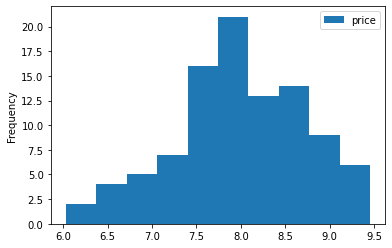

In [45]:
df[['model', 'price']] \
    .drop_duplicates() \
    .assign(price = lambda x: np.log(x['price'])) \
    .set_index('model') \
    .plot(kind='hist')

* 可以發現，上例的 `x`，已經不是 `df` 的代名詞，而是 `df` 經過 drop_duplicates 後的代名詞。 

### 4.2.2 Exercies: 新增一個 flag 欄位

* 假設我在我們現有的資料中，特別關心model這個欄位裡，有出現 "supersix" 這個字的 case
* 所以，我想新增一個欄位，內容是 model 這一欄有沒有出現 supersix (True/False)
* 我們先來看看對這個 series 可以怎麼做：

In [46]:
df["model"] \
    .str.lower() \
    .str.contains("supersix")

0        False
1        False
2        False
3        False
4         True
         ...  
15639    False
15640    False
15641    False
15642    False
15643    False
Name: model, Length: 15644, dtype: bool

* 這邊小提醒一下，如果我今天對一個 string 物件 (e.g. `a = "haha"`)，那我是可以直接用 `a.lower()` 或 `a.contains("supersix")` 這兩個 method 的
* 但今天在 pandas 的 dataframe/series 之下，我們就要先 call `str` 這個物件，才能呼叫出 string object 所擁有的這些 method
* 可以想像成，一個 pandas dataframe/series 有太多 method 可用了，他需要比較 organize 的方式，所以又多加了一層 `str` (但原因你其實是知道的，因為 dataframe/series 都是繼承前面的東西來的，所以有繼承到 `str`)
* 那有了上面的實驗結果，現在我就會做這題了：

In [47]:
df.assign(fla_supersix = lambda x: x['model'].str.lower().str.contains("supersix")).head()

,order_id,order_line,order_date,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state,fla_supersix
0,1,1,2011-01-07,1,6070,6070,Jekyll Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,False
1,1,2,2011-01-07,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Ithaca Mountain Climbers,Ithaca,NY,False
2,2,1,2011-01-10,1,2770,2770,Beast of the East 1,Mountain,Trail,Aluminum,Kansas City 29ers,Kansas City,KS,False
3,2,2,2011-01-10,1,5970,5970,Trigger Carbon 2,Mountain,Over Mountain,Carbon,Kansas City 29ers,Kansas City,KS,False
4,3,1,2011-01-10,1,10660,10660,Supersix Evo Hi-Mod Team,Road,Elite Road,Carbon,Louisville Race Equipment,Louisville,KY,True


## 4.3 Binning

* 我們如果想把一個數值變數，變成類別，可以用 `pd.cut()`
* 例如，我原本的 `price` 欄位，是數值變數

In [48]:
df['price'].head()

0     6070
1     5970
2     2770
3     5970
4    10660
Name: price, dtype: int64

* 現在，我把他切成三等分

In [49]:
pd.cut(df['price'], bins = 3)

0         (4540.0, 8665.0]
1         (4540.0, 8665.0]
2        (402.625, 4540.0]
3         (4540.0, 8665.0]
4        (8665.0, 12790.0]
               ...        
15639    (402.625, 4540.0]
15640    (402.625, 4540.0]
15641    (402.625, 4540.0]
15642    (402.625, 4540.0]
15643    (402.625, 4540.0]
Name: price, Length: 15644, dtype: category
Categories (3, interval[float64]): [(402.625, 4540.0] < (4540.0, 8665.0] < (8665.0, 12790.0]]

* 可以加個 label

In [50]:
pd.cut(df['price'], bins = 3, labels = ['low', 'medium','high'])

0        medium
1        medium
2           low
3        medium
4          high
          ...  
15639       low
15640       low
15641       low
15642       low
15643       low
Name: price, Length: 15644, dtype: category
Categories (3, object): ['low' < 'medium' < 'high']

* 最後，用剛剛實驗的結果，製造出一個新的 column 來

In [51]:
df[['model', 'price']] \
    .drop_duplicates() \
    .assign(price_group = lambda x: pd.cut(x.price, bins = 3)) \
    .head()

,model,price,price_group
0,Jekyll Carbon 2,6070,"(4540.0, 8665.0]"
1,Trigger Carbon 2,5970,"(4540.0, 8665.0]"
2,Beast of the East 1,2770,"(402.625, 4540.0]"
4,Supersix Evo Hi-Mod Team,10660,"(8665.0, 12790.0]"
5,Jekyll Carbon 4,3200,"(402.625, 4540.0]"


* 那另一種將數值變數換成類別的，是 `quantile binning`，就是將 `df.cut` 改成 `df.qcut`，然後跟他說你的切點(用百分位數)，他幫你切

In [52]:
pd.qcut(df.price, q=[0, 0.33, 0.66, 1]).head()

0    (3200.0, 12790.0]
1    (3200.0, 12790.0]
2     (2060.0, 3200.0]
3    (3200.0, 12790.0]
4    (3200.0, 12790.0]
Name: price, dtype: category
Categories (3, interval[float64]): [(414.999, 2060.0] < (2060.0, 3200.0] < (3200.0, 12790.0]]

* 可以看到，我告訴他四個切點，得到三個區間： PR0~0.33, 0.33~0.66, 0.66~1
* 那更簡便的寫法，是用 `q=3` 這個參數，那他就會幫你等分好3份(就剛好是我剛剛訂的 0.33, 0.66 這樣) 

In [53]:
pd.qcut(df.price, q=3).head()

0    (3200.0, 12790.0]
1    (3200.0, 12790.0]
2     (2060.0, 3200.0]
3    (3200.0, 12790.0]
4    (3200.0, 12790.0]
Name: price, dtype: category
Categories (3, interval[float64]): [(414.999, 2060.0] < (2060.0, 3200.0] < (3200.0, 12790.0]]

* 最終就可以寫成：

In [54]:
df[['model', 'price']] \
    .drop_duplicates() \
    .assign(price_group = lambda x: pd.qcut(x.price, q = 3)) \
    .head()

,model,price,price_group
0,Jekyll Carbon 2,6070,"(4260.0, 12790.0]"
1,Trigger Carbon 2,5970,"(4260.0, 12790.0]"
2,Beast of the East 1,2770,"(2240.0, 4260.0]"
4,Supersix Evo Hi-Mod Team,10660,"(4260.0, 12790.0]"
5,Jekyll Carbon 4,3200,"(2240.0, 4260.0]"


# 5 Summarise

## 5.1 對 series 做 summarise

* 常見的 summary function:
  * pd.Series.mean()  
  * pd.Series.median()
  * pd.Series.mode()
  * pd.Series.min()
  * pd.Series.max()
  * pd.Series.var() # variance
  * pd.Series.std()
  * pd.Series.sum()

In [55]:
df['price'].sum() # 結果是數值

55084260

In [56]:
df['price'].agg(np.sum) # `.sum` 是 `.agg(np.sum)` 的 shortcut

55084260

In [57]:
def abs_sum(x):
    res = abs(x).sum()
    return(res)
df['price'].agg(abs_sum) # 用自定義 function

55084260

## 5.2 對 DataFrame 做 summarise

In [58]:
df[['price']].sum() # 結果是 series

price    55084260
dtype: int64

In [59]:
df[['price']].sum().to_frame(name = "total") # 可用 to_frame 把他轉成 DataFrame; 用 `?pd.Series.to_frame` 來查參數

,total
price,55084260


In [60]:
# 比較常這樣寫，用 agg 來定義要處理的欄位和方法
df.agg({
    "price": np.sum
})

price    55084260
dtype: int64

In [61]:
df.agg({
    "quantity": np.sum,
    "price": np.sum
})

quantity       20172
price       55084260
dtype: int64

In [62]:
# 可以很彈性的對不同欄位，做不同操作
df.agg({
    "quantity": np.sum,
    "price": [np.sum, np.median]
})

,quantity,price
median,NaN,2700.0
sum,20172.0,55084260.0


## 5.3 對整張 table 的各個欄位做 summarise

In [63]:
df.sum() # 對所有欄位取 sum

order_id                                                   15611978
order_line                                                   132530
quantity                                                      20172
price                                                      55084260
total_price                                                71032330
model             Jekyll Carbon 2Trigger Carbon 2Beast of the Ea...
category_1        MountainMountainMountainMountainRoadMountainRo...
category_2        Over MountainOver MountainTrailOver MountainEl...
frame_material    CarbonCarbonAluminumCarbonCarbonCarbonCarbonCa...
bikeshop_name     Ithaca Mountain ClimbersIthaca Mountain Climbe...
city              IthacaIthacaKansas CityKansas CityLouisvilleLo...
state             NYNYKSKSKYKYKYKYKYMICOCOCOCOAZAZAZAZMNMNMNMNMN...
dtype: object

In [64]:
df.agg(np.sum) # 效果一樣

order_id                                                   15611978
order_line                                                   132530
quantity                                                      20172
price                                                      55084260
total_price                                                71032330
model             Jekyll Carbon 2Trigger Carbon 2Beast of the Ea...
category_1        MountainMountainMountainMountainRoadMountainRo...
category_2        Over MountainOver MountainTrailOver MountainEl...
frame_material    CarbonCarbonAluminumCarbonCarbonCarbonCarbonCa...
bikeshop_name     Ithaca Mountain ClimbersIthaca Mountain Climbe...
city              IthacaIthacaKansas CityKansas CityLouisvilleLo...
state             NYNYKSKSKYKYKYKYKYMICOCOCOCOAZAZAZAZMNMNMNMNMN...
dtype: object

In [65]:
df.agg([np.sum, np.median]) # 看多個指標

,order_id,order_line,quantity,price,total_price,model,category_1,category_2,frame_material,bikeshop_name,city,state
sum,15611978.0,132530.0,20172.0,55084260.0,71032330.0,Jekyll Carbon 2Trigger Carbon 2Beast of the Ea...,MountainMountainMountainMountainRoadMountainRo...,Over MountainOver MountainTrailOver MountainEl...,CarbonCarbonAluminumCarbonCarbonCarbonCarbonCa...,Ithaca Mountain ClimbersIthaca Mountain Climbe...,IthacaIthacaKansas CityKansas CityLouisvilleLo...,NYNYKSKSKYKYKYKYKYMICOCOCOCOAZAZAZAZMNMNMNMNMN...
median,985.5,7.0,1.0,2700.0,3200.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [66]:
# 只對數值型的欄位做 summarise
df \
    .select_dtypes(include = ["int", "float"]) \
    .agg([np.sum, np.median, np.mean])

,order_id,order_line,quantity,price,total_price
sum,1.561198e+07,132530.000000,20172.00000,5.508426e+07,7.103233e+07
median,9.855000e+02,7.000000,1.00000,2.700000e+03,3.200000e+03
mean,9.979531e+02,8.471619,1.28944,3.521111e+03,4.540548e+03


# 6 Group by 組合技

## 6.1 groupby 物件

* 我們如果依照 `cagegory_1` 做分組，那 groupby 以後，得到的事 `DataFrameGroupBy` 物件：

In [67]:
df.groupby("category_1")

## 6.2 groupby + agg

* 就是 R 的 group_by + summarise，但要小心： groupby 後的變數，會被拉成 rownames (pandas 中稱為 index)：

In [68]:
summary_df_1 = df \
    .groupby(['category_1', 'category_2']) \
    .agg({'total_price': np.mean})
summary_df_1

total_price
category_1 category_2                     
Mountain   Cross Country Race  6740.753857
           Fat Bike            3580.340136
           Over Mountain       6476.706587
           Sport               1126.314103
           Trail               4640.326733
Road       Cyclocross          3155.868263
           Elite Road          4416.666187
           Endurance Road      4014.331013
           Triathalon          4675.605536

* 可以看到， `category_1`, `category_2` 都變成 rownames 了。  
* 如果想讓他們維持 variable 的身份，那就要用 `.reset_index()` 把他拉回來。

In [69]:
summary_df_1 = df \
    .groupby(['category_1', 'category_2']) \
    .agg({'total_price': np.mean}) \
    .reset_index()
summary_df_1

,category_1,category_2,total_price
0,Mountain,Cross Country Race,6740.753857
1,Mountain,Fat Bike,3580.340136
2,Mountain,Over Mountain,6476.706587
3,Mountain,Sport,1126.314103
4,Mountain,Trail,4640.326733
5,Road,Cyclocross,3155.868263
6,Road,Elite Road,4416.666187
7,Road,Endurance Road,4014.331013
8,Road,Triathalon,4675.605536


* 對於時間性的資料，我們還可以用 `.resample("W")` ，把原本的時間，重新分類成一週一組，然後給他標籤
* 所以，我現在想做件事： 依照 `category_2` 做分組，在每組中，我再把 `order_date` 轉成以週為單位分組，然後加總每類每週的 total_price 和 quantity

In [70]:
summary_df_3 = df[['category_2', 'order_date', 'total_price', 'quantity']] \
    .set_index('order_date') \
    .groupby('category_2') \
    .resample("W") \
    .agg(np.sum) \
    .reset_index()
summary_df_3

,category_2,order_date,total_price,quantity
0,Cross Country Race,2011-01-16,61750,8
1,Cross Country Race,2011-01-23,25050,4
2,Cross Country Race,2011-01-30,56860,14
3,Cross Country Race,2011-02-06,8740,3
4,Cross Country Race,2011-02-13,78070,15
...,...,...,...,...
2324,Triathalon,2015-11-29,21250,6
2325,Triathalon,2015-12-06,5850,3
2326,Triathalon,2015-12-13,0,0
2327,Triathalon,2015-12-20,10200,2


## 6.3 groupby + mutate (apply)

* 舉例來說，我想先分組後，對每組做 normalize  
* 那就以剛剛的 summary_df_3 為例，我想對 `category_2` 分組後，然後把裡面的時間序列資料，做 normalize
* 那很快想到，可以 groupby 後，用 `.assign`
* 但討厭的是，不能用 `.assign`， `.assign` 不能用在分組物件上。
* 而分組物件可以用的，叫做 `.apply`
* 所以，記得改成用 `.apply(lambda x: ...)` 就好，寫法跟之前的 assign 都一樣。 `x` 就是上一階對最後的 DataFrame 的代名詞。
* 來練習吧：

In [71]:
summary_df_3 \
    .set_index('order_date') \
    .groupby('category_2') \
    .apply(lambda x: (x.total_price - x.total_price.mean()) / x.total_price.std()) \
    .reset_index()

,category_2,order_date,total_price
0,Cross Country Race,2011-01-16,-0.241538
1,Cross Country Race,2011-01-23,-0.952038
2,Cross Country Race,2011-01-30,-0.336207
3,Cross Country Race,2011-02-06,-1.267795
4,Cross Country Race,2011-02-13,0.074411
...,...,...,...
2324,Triathalon,2015-11-29,0.387521
2325,Triathalon,2015-12-06,-0.678455
2326,Triathalon,2015-12-13,-1.083388
2327,Triathalon,2015-12-20,-0.377352


* 那如果我今天想對每一個欄位做 normalize 怎辦？ 善用 python/pandas 的 vectorization 功能
* 講白話文就是，如果我的資料集叫 x ，那我可以用 `x - x.mean()` (矩陣 - 向量)，得到每個 column 減去 column_mean 的結果。然後，我再除以 `x.std()`，那就完成了： 

In [72]:
summary_df_3 \
    .set_index(['order_date', 'category_2']) \
    .groupby('category_2') \
    .apply(lambda x: (x - x.mean())/x.std()) \
    .reset_index()

,order_date,category_2,total_price,quantity
0,2011-01-16,Cross Country Race,-0.241538,-0.641784
1,2011-01-23,Cross Country Race,-0.952038,-1.054502
2,2011-01-30,Cross Country Race,-0.336207,-0.022707
3,2011-02-06,Cross Country Race,-1.267795,-1.157681
4,2011-02-13,Cross Country Race,0.074411,0.080472
...,...,...,...,...
2324,2015-11-29,Triathalon,0.387521,0.415754
2325,2015-12-06,Triathalon,-0.678455,-0.381878
2326,2015-12-13,Triathalon,-1.083388,-1.179510
2327,2015-12-20,Triathalon,-0.377352,-0.647755


## 6.4 groupby + filter (apply)

In [77]:
summary_df_3 \
    .groupby("category_2") \
    

AttributeError: 'DataFrameGroupBy' object has no attribute 'sort_values'

In [73]:
summary_df_3 \
    .groupby("category_2") \
    .apply(lambda x: x[x["total_price"]>50000])

category_2 order_date  total_price  quantity
category_2                                                                   
Cross Country Race 0     Cross Country Race 2011-01-16        61750         8
                   2     Cross Country Race 2011-01-30        56860        14
                   4     Cross Country Race 2011-02-13        78070        15
                   5     Cross Country Race 2011-02-20       115010        21
                   6     Cross Country Race 2011-02-27        64290        17
...                                     ...        ...          ...       ...
Triathalon         2239          Triathalon 2014-04-13        78400        19
                   2244          Triathalon 2014-05-18        84050        19
                   2288          Triathalon 2015-03-22        54900        12
                   2292          Triathalon 2015-04-19        64000        13
                   2297          Triathalon 2015-05-24        54450        14

[503 rows x 4 columns]